In [1]:
# This code loads the Excel file and checks the sheet names and the first few rows of each sheet.
import pandas as pd

# Load the Excel file
file_path = 'TechSolutions - Data Set.xlsx'
dataframes = pd.read_excel(file_path, sheet_name=None)

# Get the names of the sheets and the first few rows of each sheet
sheet_info = {sheet_name: df.head() for sheet_name, df in dataframes.items()}
sheet_info

{'C2':    Project ID  Client ID         Service Type  Project Cost (GHS)  \
 0           1       5001  Cybersecurity Audit             15000.0   
 1           2       5002      Cloud Migration             25000.0   
 2           3       5003    IT Infrastructure             30000.0   
 3           4       5004         Software Dev             50000.0   
 4           5       5005   IT Support Package             10000.0   
 
    Duration (Days)  Client Satisfaction (1-5) Repeat Client Completion Status  
 0             14.0                        3.0            No         Completed  
 1             21.0                        4.0           Yes         Completed  
 2             35.0                        2.0            No           Delayed  
 3             45.0                        5.0           Yes         Completed  
 4              7.0                        4.0            No         Completed  }

In [2]:
# This code checks for missing values in each dataframe loaded from the Excel file.

# Check for missing values in each dataframe
missing_values = {sheet_name: df.isnull().sum() for sheet_name, df in dataframes.items()}

missing_values

{'C2': Project ID                    0
 Client ID                     0
 Service Type                  0
 Project Cost (GHS)            2
 Duration (Days)               2
 Client Satisfaction (1-5)    12
 Repeat Client                 2
 Completion Status             2
 dtype: int64}

In [3]:
# This code handles missing values by imputing them with mean/median for numerical columns and mode for categorical columns.

# Impute missing values
for sheet_name, df in dataframes.items():
    # Numerical columns imputation
    df['Project Cost (GHS)'].fillna(df['Project Cost (GHS)'].mean(), inplace=True)
    df['Duration (Days)'].fillna(df['Duration (Days)'].mean(), inplace=True)
    df['Client Satisfaction (1-5)'].fillna(df['Client Satisfaction (1-5)'].median(), inplace=True)
    
    # Categorical columns imputation
    df['Repeat Client'].fillna(df['Repeat Client'].mode()[0], inplace=True)
    df['Completion Status'].fillna(df['Completion Status'].mode()[0], inplace=True)

# Check the missing values again to confirm they have been handled
missing_values_after = {sheet_name: df.isnull().sum() for sheet_name, df in dataframes.items()}

missing_values_after

C:\Users\frank\AppData\Local\Temp\ipykernel_25744\1412834005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Project Cost (GHS)'].fillna(df['Project Cost (GHS)'].mean(), inplace=True)
C:\Users\frank\AppData\Local\Temp\ipykernel_25744\1412834005.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

{'C2': Project ID                   0
 Client ID                    0
 Service Type                 0
 Project Cost (GHS)           0
 Duration (Days)              0
 Client Satisfaction (1-5)    0
 Repeat Client                0
 Completion Status            0
 dtype: int64}

In [4]:
# This code checks for duplicate rows in each dataframe loaded from the Excel file.

# Check for duplicates in each dataframe
duplicates = {sheet_name: df.duplicated().sum() for sheet_name, df in dataframes.items()}

duplicates

{'C2': np.int64(0)}

In [5]:
# This code checks for duplicate Client IDs in the dataframe to evaluate their occurrence.

# Check for duplicate Client IDs
client_id_duplicates = dataframes['C2']['Client ID'].duplicated(keep=False)

# Count the occurrences of each Client ID
client_id_counts = dataframes['C2']['Client ID'].value_counts()

# Filter to show only Client IDs that are duplicated
duplicate_client_ids = client_id_counts[client_id_counts > 1]

duplicate_client_ids

Client ID
5002    3
5001    2
5003    2
5004    2
5005    2
5006    2
5007    2
5009    2
5011    2
5013    2
5021    2
5017    2
5015    2
5019    2
Name: count, dtype: int64

The repeating Client IDs indicate that these clients have multiple entries in the dataset, likely representing different projects or interactions rather than duplicate rows. Each entry may contain unique information about a specific project, such as costs, durations, and satisfaction ratings. Therefore, they are not duplicates in the sense of identical rows but rather valid multiple records for the same client.

In [7]:
# This code calculates the IQR and identifies outliers for the numerical columns.

# Define a function to identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers for each relevant numerical column
outliers_cost = identify_outliers_iqr(dataframes['C2'], 'Project Cost (GHS)')
outliers_duration = identify_outliers_iqr(dataframes['C2'], 'Duration (Days)')
outliers_satisfaction = identify_outliers_iqr(dataframes['C2'], 'Client Satisfaction (1-5)')

# Count the number of outliers in each column
outlier_counts = {
    'Project Cost (GHS)': outliers_cost.shape[0],
    'Duration (Days)': outliers_duration.shape[0],
    'Client Satisfaction (1-5)': outliers_satisfaction.shape[0]
}

outlier_counts

{'Project Cost (GHS)': 0, 'Duration (Days)': 3, 'Client Satisfaction (1-5)': 0}

The analysis revealed that there are no outliers in "Project Cost (GHS)" and "Client Satisfaction (1-5)", while there are 3 outliers in "Duration (Days)".
To continue, I will evaluate these outliers in "Duration (Days)" to determine whether to remove them or adjust them based on their values and context. 

In [8]:
# This code retrieves the outliers for 'Duration (Days)' to evaluate their values.

# Display the outliers for Duration (Days)
outliers_duration

,Project ID,Client ID,Service Type,Project Cost (GHS),Duration (Days),Client Satisfaction (1-5),Repeat Client,Completion Status
79,80,5017,Software Dev,58000.0,90.0,2.0,No,Delayed
86,87,5019,Software Dev,59000.0,95.0,3.0,Yes,Delayed
93,94,5021,Software Dev,60000.0,100.0,4.0,No,Delayed


Three projects had unusually long durations (90, 95, and 100 days), which could be either valid long term projects or data entry errors. After evaluating, the options was to remove, adjuste, or keeping them. I chose to remove them as outliers to preserve the integrity of the analysis, given their rarity and potential to skew results.

In [9]:
# This code removes the identified outliers from the 'Duration (Days)' column.

# Remove outliers from the original dataframe
cleaned_data = dataframes['C2'][~dataframes['C2']['Duration (Days)'].isin(outliers_duration['Duration (Days)'])]

# Display the cleaned data to confirm removal of outliers
cleaned_data.head()

,Project ID,Client ID,Service Type,Project Cost (GHS),Duration (Days),Client Satisfaction (1-5),Repeat Client,Completion Status
0,1,5001,Cybersecurity Audit,15000.0,14.0,3.0,No,Completed
1,2,5002,Cloud Migration,25000.0,21.0,4.0,Yes,Completed
2,3,5003,IT Infrastructure,30000.0,35.0,2.0,No,Delayed
3,4,5004,Software Dev,50000.0,45.0,5.0,Yes,Completed
4,5,5005,IT Support Package,10000.0,7.0,4.0,No,Completed


In [10]:
# This code analyzes trends in client retention and project completion times.

# First, let's calculate the average project completion time and the number of repeat clients.
# We will also analyze revenue from different IT service categories.

# Group by 'Service Type' to analyze revenue and project completion times
service_analysis = dataframes['C2'].groupby('Service Type').agg({
    'Project Cost (GHS)': 'sum',  # Total revenue per service type
    'Duration (Days)': 'mean',  # Average duration per service type
    'Client ID': 'nunique'  # Unique clients per service type
}).reset_index()

# Rename columns for clarity
service_analysis.columns = ['Service Type', 'Total Revenue (GHS)', 'Average Duration (Days)', 'Unique Clients']

# Display the service analysis result
service_analysis

,Service Type,Total Revenue (GHS),Average Duration (Days),Unique Clients
0,Cloud Migration,441000.000000,33.702624,14
1,Cybersecurity Audit,278000.000000,21.214286,14
2,Data Analytics,392086.734694,38.571429,14
3,IT Infrastructure,552000.000000,46.589116,15
4,IT Support Package,201086.734694,10.928571,14
5,Software Dev,794000.000000,70.533333,12
6,Website Development,150500.000000,18.928571,13


I will proceed to save the cleaned data as a CSV file. After that, I can easily upload this file to Power BI for further analysis and visualization. Let's go ahead and export the cleaned data.

In [16]:
# This code exports the cleaned data to a CSV file.
cleaned_data.to_csv('cleaned_tech_solutions_data.csv', index=False)

Let's analyze the data and provide visuals

Identify trends in client retention and project completion times.

Donut Chart for Client Type Breakdown (Returned vs. One-time Clients): This chart shows the percentage breakdown of clients who are returning versus those who are one-time users.

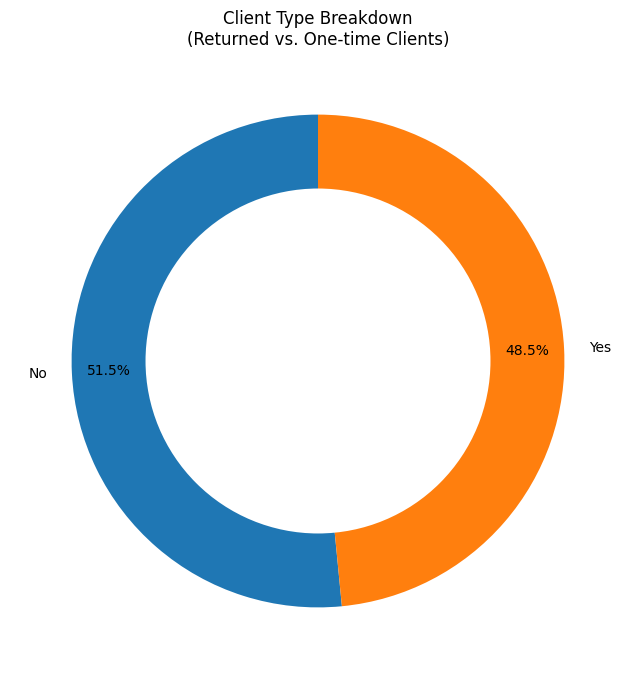

In [18]:
import matplotlib.pyplot as plt  
  
# Donut Chart for Client Type Breakdown  
client_counts = cleaned_data['Repeat Client'].value_counts()  
plt.figure(figsize=(8, 8))  
plt.pie(client_counts, labels=client_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)  
  
# Draw center circle to create donut shape  
centre_circle = plt.Circle((0,0), 0.70, fc='white')  
fig = plt.gcf()  
fig.gca().add_artist(centre_circle)  
  
plt.title("Client Type Breakdown\n(Returned vs. One-time Clients)")  
plt.show()  

Clustered Bar Chart for Retention by Service: This chart displays the count of unique clients by service type, separated by whether they are returned or one-time.

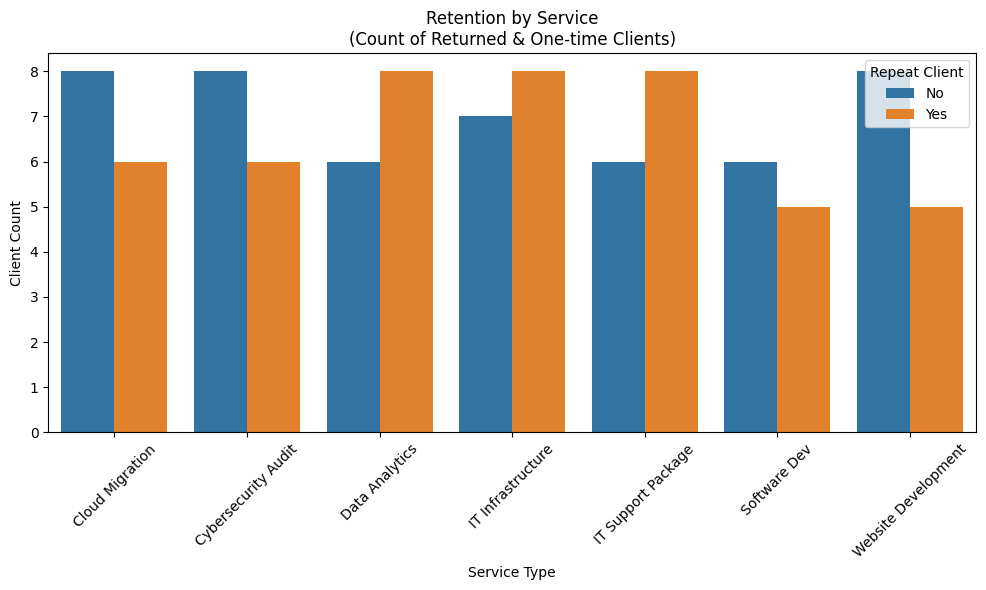

In [19]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# Group data for retention by service  
service_retention = cleaned_data.groupby(['Service Type', 'Repeat Client'])['Client ID'].nunique().reset_index()  
service_retention = service_retention.rename(columns={'Client ID': 'Client Count'})  
  
plt.figure(figsize=(10, 6))  
sns.barplot(x='Service Type', y='Client Count', hue='Repeat Client', data=service_retention)  
plt.title("Retention by Service\n(Count of Returned & One-time Clients)")  
plt.xlabel("Service Type")  
plt.ylabel("Client Count")  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

Combined Bar and Line Chart for Retention Over Time: This dual axis chart shows the total number of clients per month (as bars) and the return rate percentage (as a line) over time.

C:\Users\frank\AppData\Local\Temp\ipykernel_25744\3559567256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Start Month'] = cleaned_data['Project Start Date'].dt.to_period('M').astype(str)


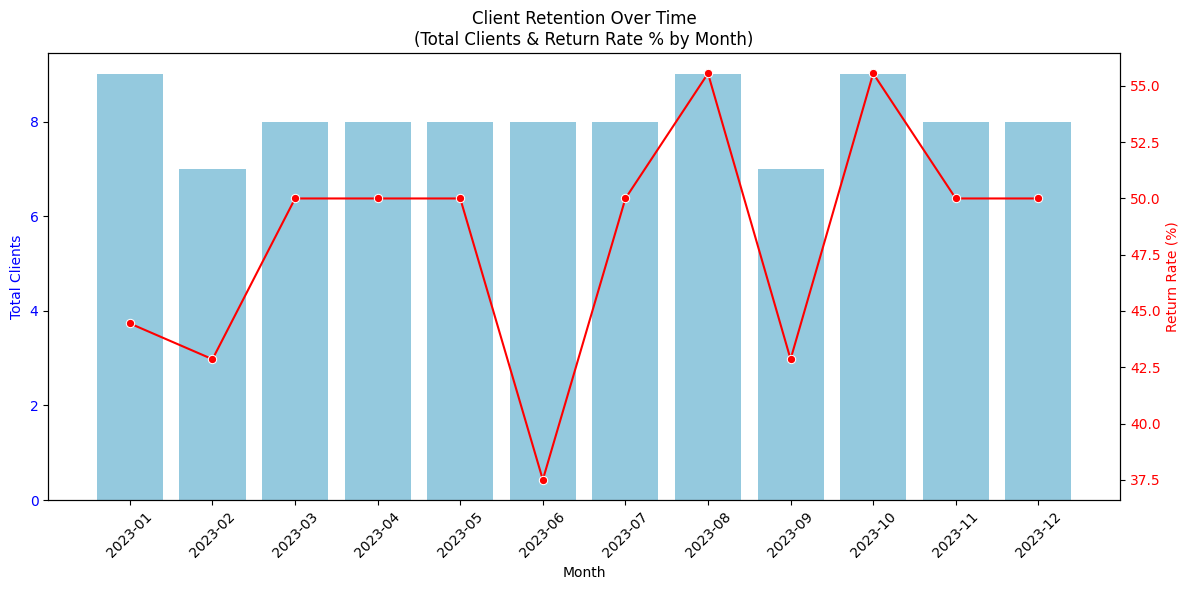

In [20]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Assuming 'Project Start Date' is present or simulated  
if 'Project Start Date' not in cleaned_data.columns:  
    num_rows = cleaned_data.shape[0]  
    date_range = pd.date_range(start='2023-01-01', end='2023-12-31', periods=num_rows)  
    cleaned_data['Project Start Date'] = date_range  
  
cleaned_data['Start Month'] = cleaned_data['Project Start Date'].dt.to_period('M').astype(str)  
  
# Calculate monthly totals and repeat counts  
monthly_clients = cleaned_data.groupby('Start Month')['Client ID'].nunique().reset_index().rename(columns={'Client ID': 'Total Clients'})  
monthly_repeat = cleaned_data[cleaned_data['Repeat Client'] == 'Yes'].groupby('Start Month')['Client ID'].nunique().reset_index().rename(columns={'Client ID': 'Repeat Clients'})  
  
monthly_retention = pd.merge(monthly_clients, monthly_repeat, on='Start Month', how='left')  
monthly_retention['Repeat Clients'] = monthly_retention['Repeat Clients'].fillna(0)  
monthly_retention['Return Rate (%)'] = (monthly_retention['Repeat Clients'] / monthly_retention['Total Clients']) * 100  
monthly_retention = monthly_retention.sort_values('Start Month')  
  
fig, ax1 = plt.subplots(figsize=(12, 6))  
sns.barplot(x='Start Month', y='Total Clients', data=monthly_retention, ax=ax1, color='skyblue')  
ax1.set_xlabel('Month')  
ax1.set_ylabel('Total Clients', color='blue')  
ax1.tick_params(axis='y', labelcolor='blue')  
plt.xticks(rotation=45)  
  
ax2 = ax1.twinx()  
sns.lineplot(x='Start Month', y='Return Rate (%)', data=monthly_retention, ax=ax2, marker='o', color='red', sort=False)  
ax2.set_ylabel('Return Rate (%)', color='red')  
ax2.tick_params(axis='y', labelcolor='red')  
  
plt.title("Client Retention Over Time\n(Total Clients & Return Rate % by Month)")  
plt.tight_layout()  
plt.show()  

Project Completion Time Visuals

Clustered Column Chart for Average Duration by Service: This chart shows the average project duration (in days) for each IT service category.

C:\Users\frank\AppData\Local\Temp\ipykernel_25744\217911411.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service Type', y='Duration (Days)', data=avg_duration_service, palette='viridis')


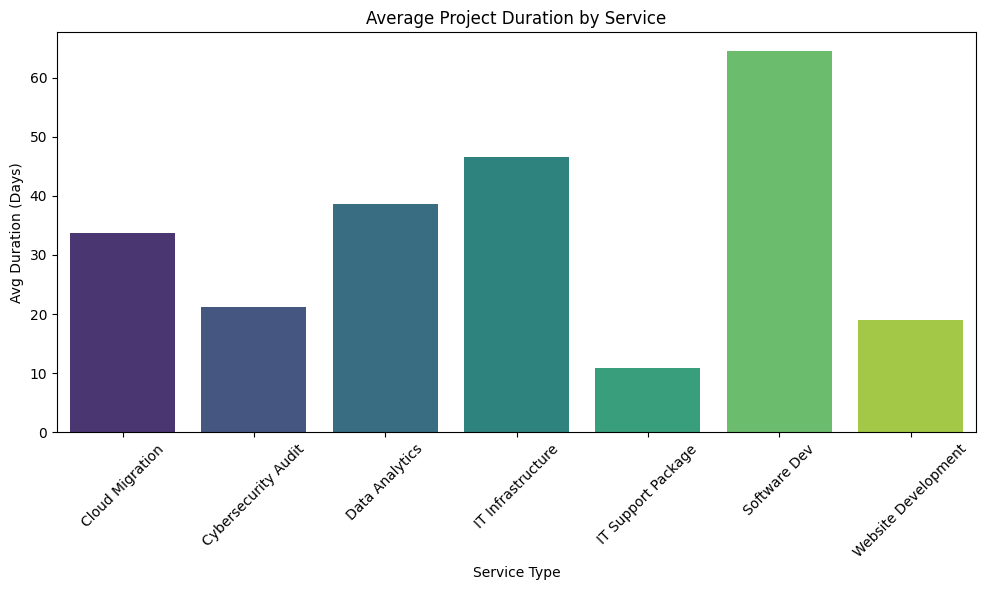

In [21]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
avg_duration_service = cleaned_data.groupby('Service Type')['Duration (Days)'].mean().reset_index()  
  
plt.figure(figsize=(10, 6))  
sns.barplot(x='Service Type', y='Duration (Days)', data=avg_duration_service, palette='viridis')  
plt.title("Average Project Duration by Service")  
plt.xlabel("Service Type")  
plt.ylabel("Avg Duration (Days)")  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

Histogram for Duration Distribution: This histogram visualizes the distribution of project completion times (duration in days) using defined bins.

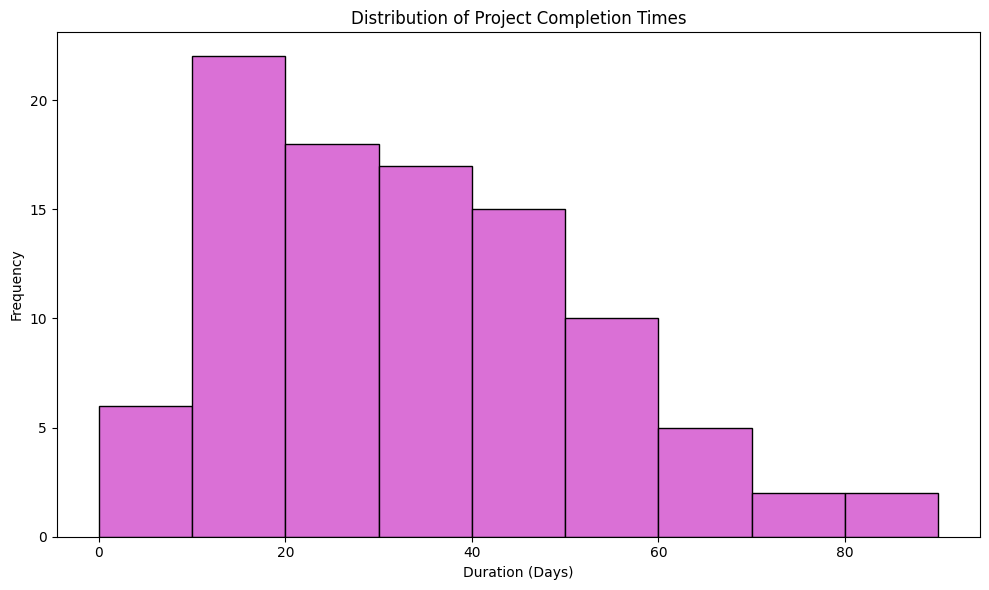

In [22]:
import matplotlib.pyplot as plt  
  
max_duration = cleaned_data['Duration (Days)'].max()  
bins = list(range(0, int(max_duration)+10, 10))  
  
plt.figure(figsize=(10, 6))  
plt.hist(cleaned_data['Duration (Days)'], bins=bins, color='orchid', edgecolor='black')  
plt.title("Distribution of Project Completion Times")  
plt.xlabel("Duration (Days)")  
plt.ylabel("Frequency")  
plt.tight_layout()  
plt.show()  

Line Chart for Trend Over Time (Average Duration by Month): This line chart plots the average project duration by month (using project start dates).

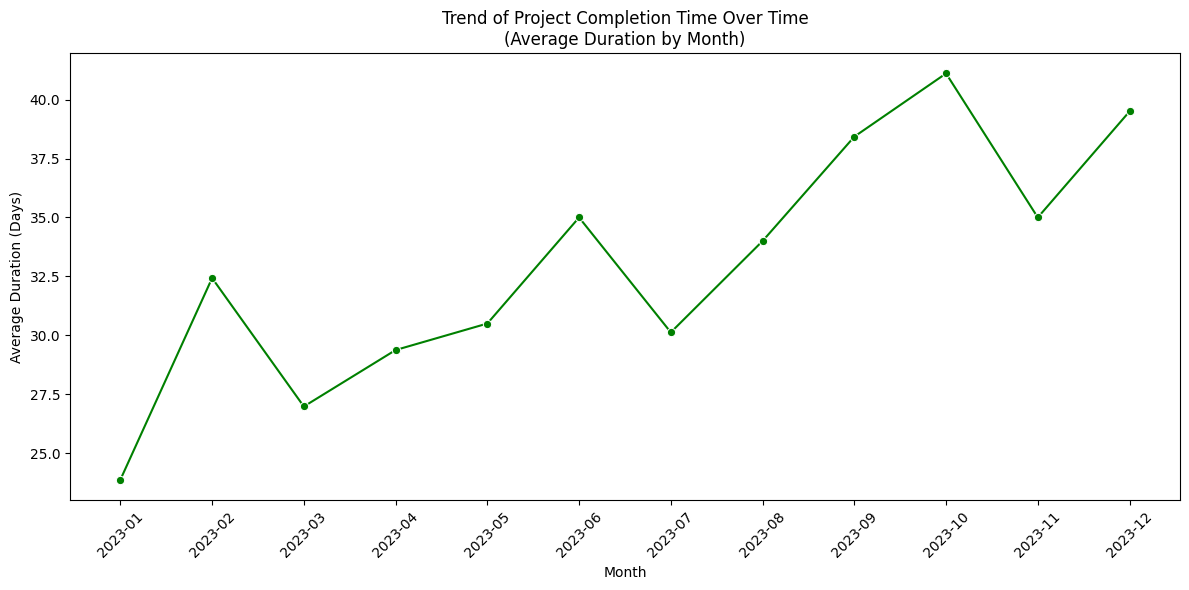

In [23]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
monthly_duration = cleaned_data.groupby('Start Month')['Duration (Days)'].mean().reset_index()  
monthly_duration = monthly_duration.sort_values('Start Month')  
  
plt.figure(figsize=(12, 6))  
sns.lineplot(x='Start Month', y='Duration (Days)', data=monthly_duration, marker='o', color='green')  
plt.title("Trend of Project Completion Time Over Time\n(Average Duration by Month)")  
plt.xlabel("Month")  
plt.ylabel("Average Duration (Days)")  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

Examine revenue from different IT service categories.

C:\Users\frank\AppData\Local\Temp\ipykernel_25744\2864341657.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_service.values, y=revenue_by_service.index, palette='Blues_d')


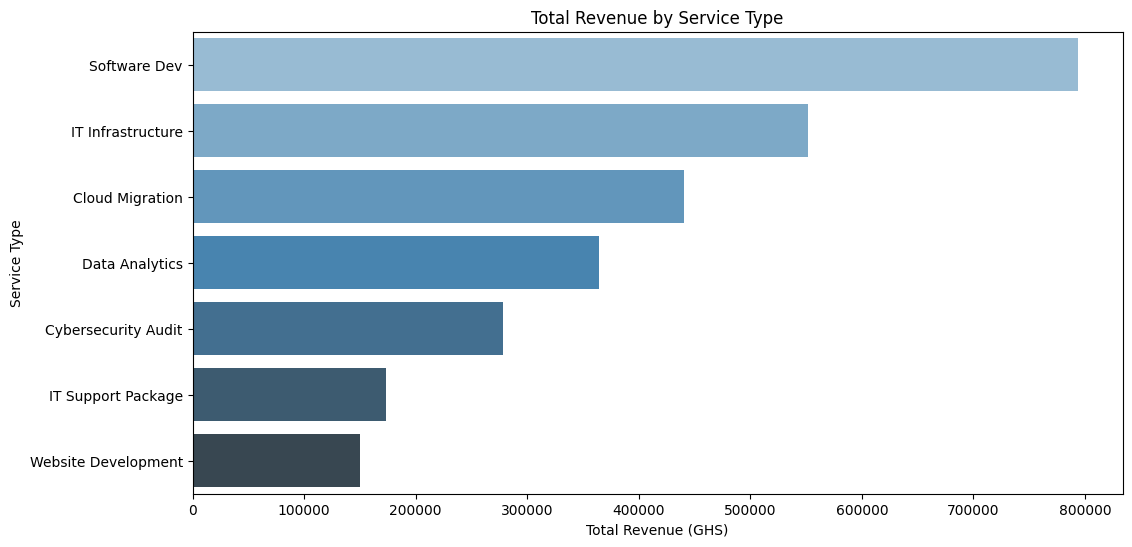

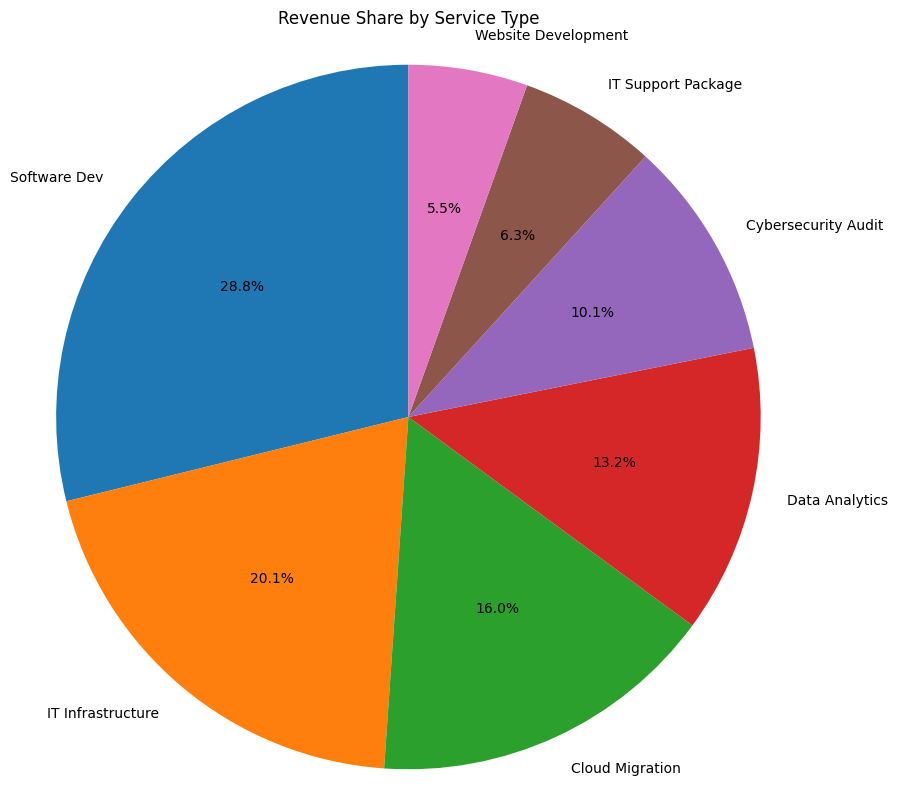

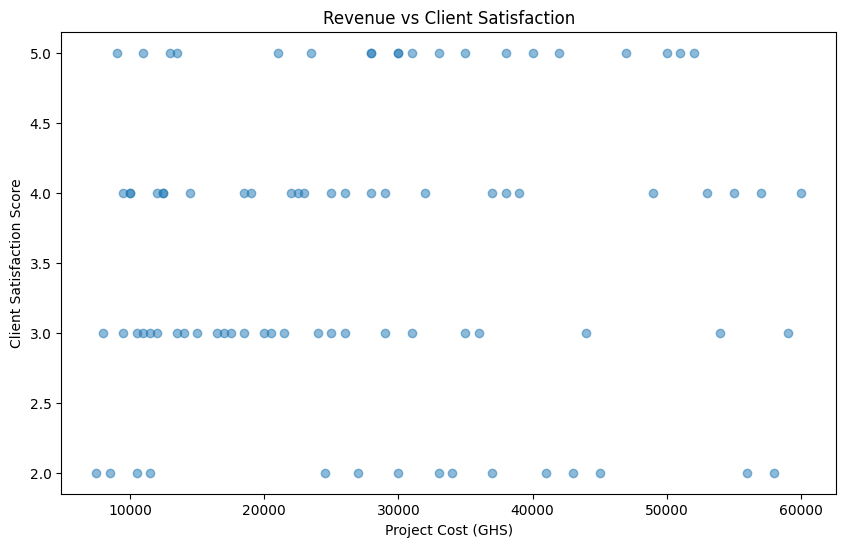

Key Metrics:
Total Revenue: GHS 2,752,500
Average Revenue per Project: GHS 28,087
Highest-Grossing Service: Software Dev (GHS 794,000 )


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel('TechSolutions - Data Set.xlsx')

# Revenue by Service Type
plt.figure(figsize=(12,6))
revenue_by_service = df.groupby('Service Type')['Project Cost (GHS)'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_service.values, y=revenue_by_service.index, palette='Blues_d')
plt.title('Total Revenue by Service Type')
plt.xlabel('Total Revenue (GHS)')
plt.ylabel('Service Type')
plt.show()

# Revenue Share (Donut Chart)
plt.figure(figsize=(10,10))
plt.pie(revenue_by_service, labels=revenue_by_service.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Service Type')
plt.axis('equal')
plt.show()

# Revenue vs Client Satisfaction
plt.figure(figsize=(10,6))
plt.scatter(df['Project Cost (GHS)'], df['Client Satisfaction (1-5)'], alpha=0.5)
plt.title('Revenue vs Client Satisfaction')
plt.xlabel('Project Cost (GHS)')
plt.ylabel('Client Satisfaction Score')
plt.show()

# Key Metrics
print('\
Key Metrics:')
print('Total Revenue: GHS', format(df['Project Cost (GHS)'].sum(), ',.0f'))
print('Average Revenue per Project: GHS', format(df['Project Cost (GHS)'].mean(), ',.0f'))
print('Highest-Grossing Service:', revenue_by_service.index[0], 
      '(GHS', format(revenue_by_service.iloc[0], ',.0f'), ')')

Evaluate factors affecting customer satisfaction and repeat business.

C:\Users\frank\AppData\Local\Temp\ipykernel_25744\405818495.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_satisfaction.values, y=avg_satisfaction.index, palette='Blues_d')


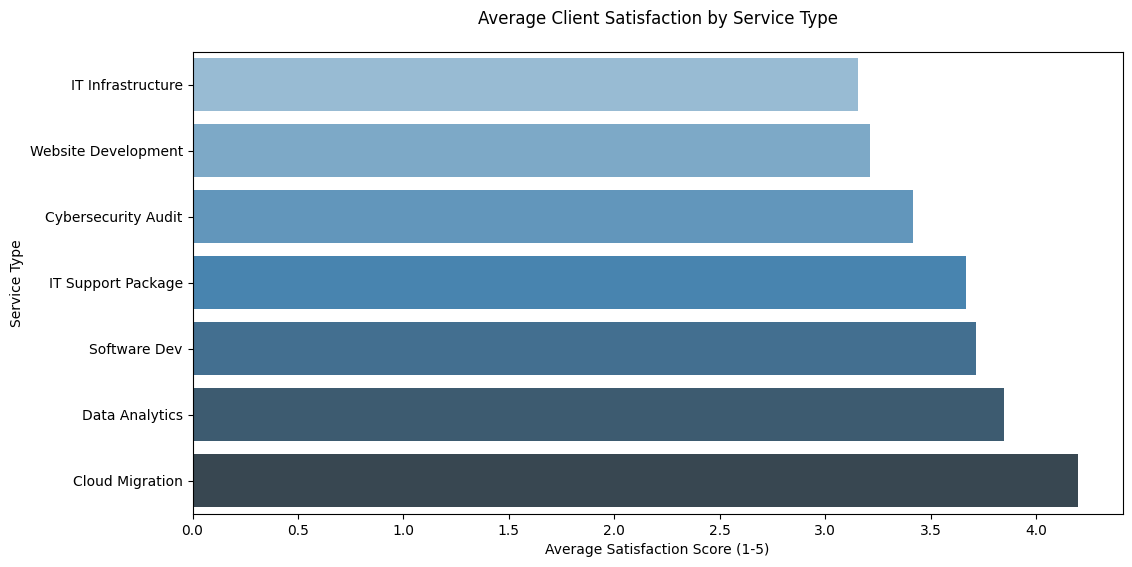

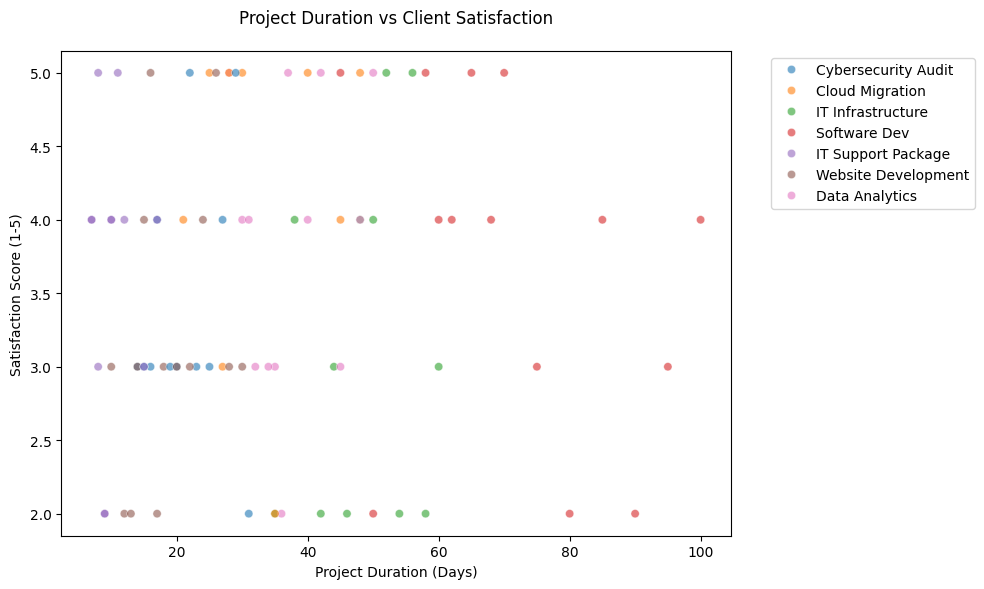

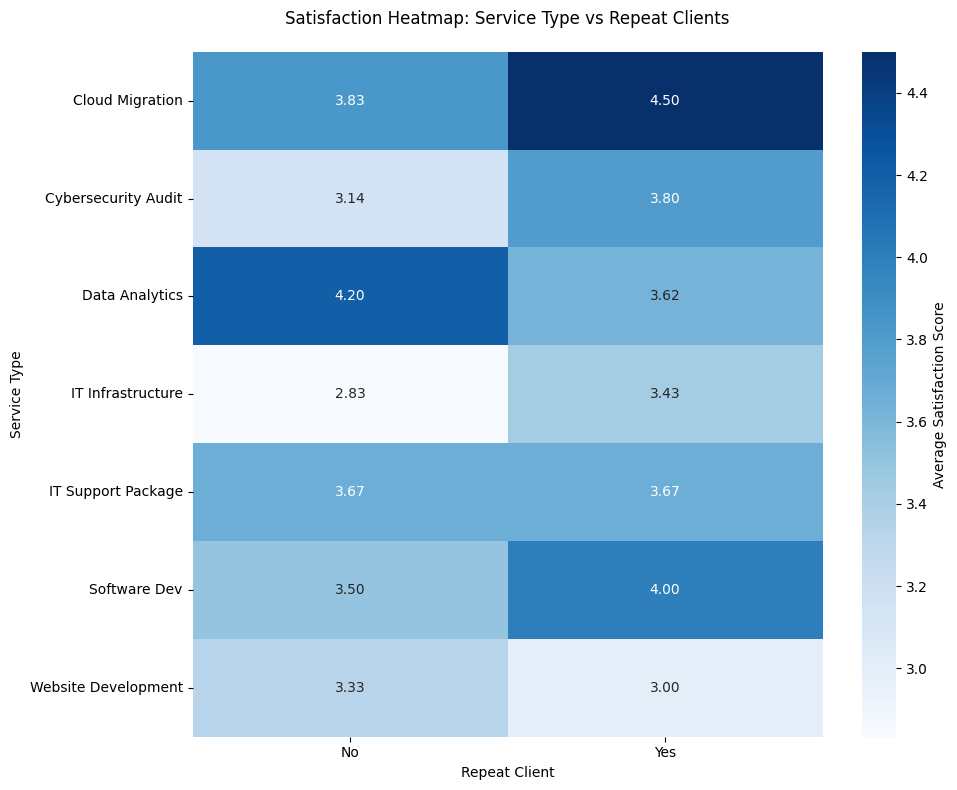

Key Satisfaction Metrics:
Overall Average Satisfaction: 3.58
Repeat Client Rate: 48.0%
Correlation between Duration and Satisfaction: 0.036
Highest Rated Service: Cloud Migration (Score: 4.20)


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_excel('TechSolutions - Data Set.xlsx')

# 1. Average Satisfaction by Service
plt.figure(figsize=(12, 6))
avg_satisfaction = df.groupby('Service Type')['Client Satisfaction (1-5)'].mean().sort_values(ascending=True)
sns.barplot(x=avg_satisfaction.values, y=avg_satisfaction.index, palette='Blues_d')
plt.title('Average Client Satisfaction by Service Type', pad=20)
plt.xlabel('Average Satisfaction Score (1-5)')
plt.ylabel('Service Type')
plt.show()

# 2. Duration vs Satisfaction Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (Days)', y='Client Satisfaction (1-5)', 
                hue='Service Type', alpha=0.6)
plt.title('Project Duration vs Client Satisfaction', pad=20)
plt.xlabel('Project Duration (Days)')
plt.ylabel('Satisfaction Score (1-5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Satisfaction Heatmap by Service Type and Repeat Client Status
pivot_table = pd.pivot_table(df, 
                           values='Client Satisfaction (1-5)',
                           index='Service Type',
                           columns='Repeat Client',
                           aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f', 
            cbar_kws={'label': 'Average Satisfaction Score'})
plt.title('Satisfaction Heatmap: Service Type vs Repeat Clients', pad=20)
plt.tight_layout()
plt.show()

# Key Statistics
print('\
Key Satisfaction Metrics:')
print('Overall Average Satisfaction:', round(df['Client Satisfaction (1-5)'].mean(), 2))
print('Repeat Client Rate:', f"{(df['Repeat Client'] == 'Yes').mean()*100:.1f}%")
print('\
Correlation between Duration and Satisfaction:', 
      round(df['Duration (Days)'].corr(df['Client Satisfaction (1-5)']), 3))

# Service with highest satisfaction
best_service = avg_satisfaction.index[-1]
best_score = avg_satisfaction.iloc[-1]
print(f'\
Highest Rated Service: {best_service} (Score: {best_score:.2f})')